# Mobile Price Prediction using Logistic Regression, Decision Tree classification and RandomForest classification 

In [111]:
from warnings import filterwarnings
filterwarnings('ignore')

In [112]:
import pandas as pd
path = r"D:\Master in Data Science class\Project Documents\Mobile Price Classification\train.csv"
df = pd.read_csv(path)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

There are no missing values

In [114]:
df.duplicated().sum()

np.int64(0)

In [115]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

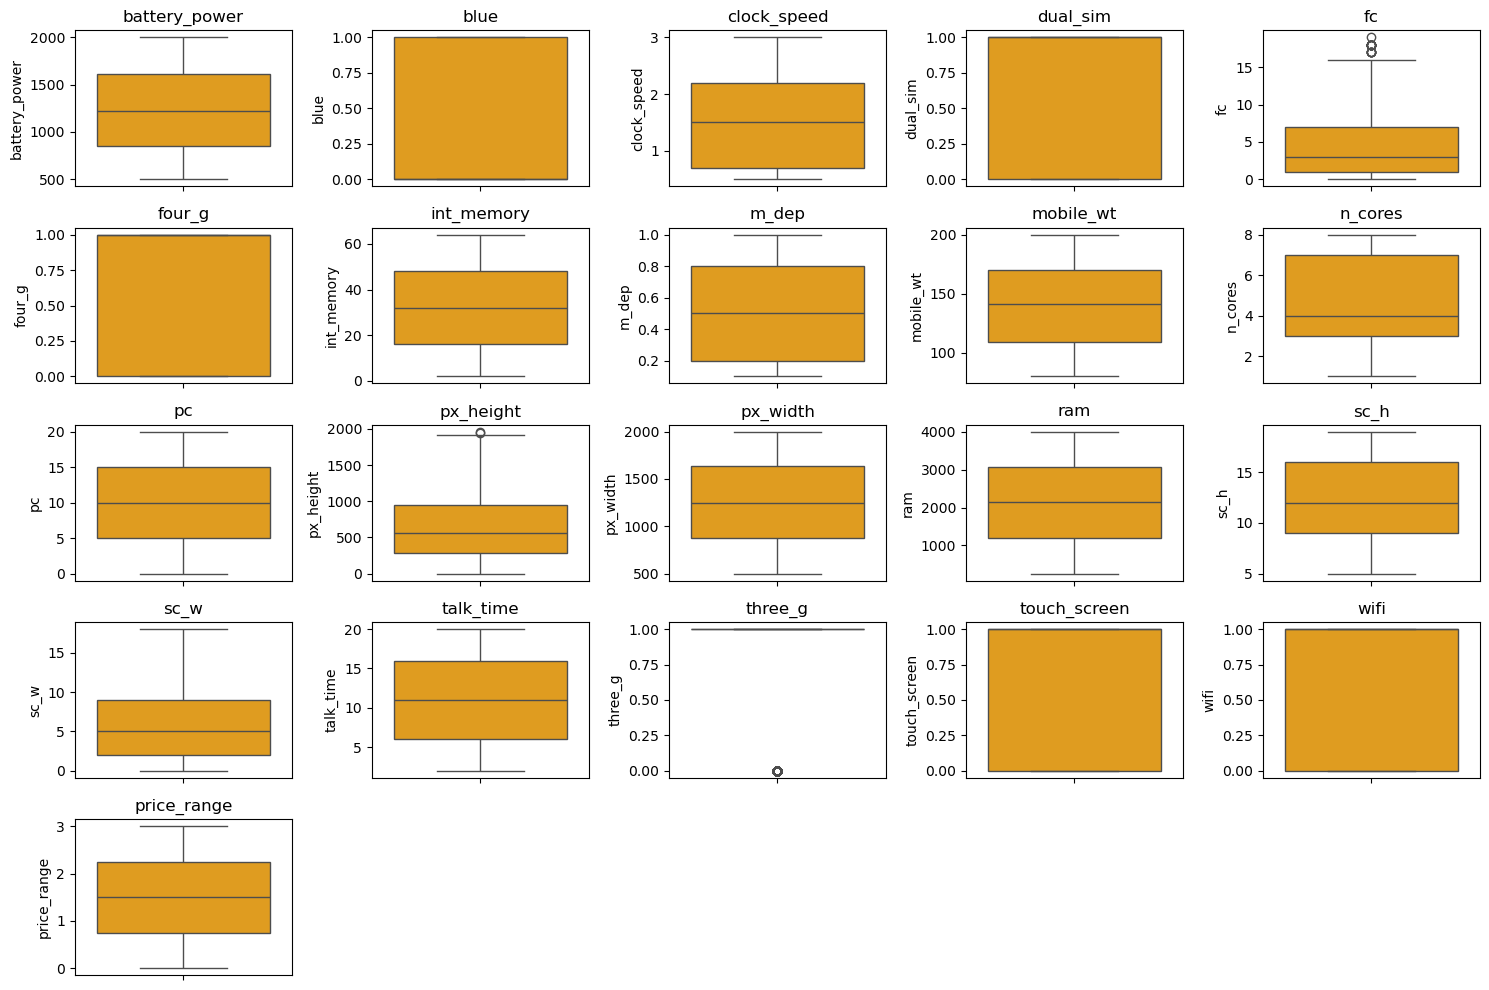

In [117]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=df[col], color='orange')
    plt.title(col)
    plt.tight_layout()
plt.show()

There are no duplicated values


In [118]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [119]:
print(df['px_height'].unique())

[  20  905 1263 ...  528  915  483]


In [120]:
df['fc'].unique()

array([ 1,  0,  2, 13,  3,  4,  5,  7, 11, 12, 16,  6, 15,  8,  9, 10, 18,
       17, 14, 19])

# Separate X and Y features

In [121]:
X = df.drop(columns=['price_range'])
Y = df[['price_range']]

In [122]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [123]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


# Data Preprocessing and data cleaning

In [124]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [125]:
pre = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
).set_output(transform='pandas')

In [126]:
X_pre = pre.fit_transform(X)
X_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


# Train test split

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.8,random_state=21)

In [129]:
xtrain.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1490,-0.508796,1.010051,-0.885327,-1.019184,0.159088,-1.043966,-1.105027,-0.006069,-1.080761,-0.664768,0.673534,-0.698961,-1.324987,0.155641,-1.734608,-1.094526,-1.649584,-1.786861,0.994018,-1.014099
965,0.319779,-0.990050,-1.253064,0.981177,-0.762495,-1.043966,-0.719165,-0.699686,-0.176571,1.521249,1.168355,-0.581757,-1.343502,1.648549,-0.310171,-0.864922,1.462493,-1.786861,0.994018,0.986097
1216,-0.183285,-0.990050,-1.007906,0.981177,-0.762495,0.957886,-0.167933,0.687548,-0.487386,-1.101971,1.663176,-0.753055,1.260114,-0.536869,1.114266,0.742313,0.730240,0.559641,-1.006018,0.986097
500,0.089872,1.010051,-1.253064,0.981177,-0.762495,-1.043966,1.210147,-1.393304,-1.024249,1.521249,1.003414,-0.144495,-1.160670,-0.893728,-1.259796,-1.094526,1.645557,-1.786861,-1.006018,0.986097
403,0.540580,1.010051,-0.395011,0.981177,-0.992890,0.957886,1.265271,-1.393304,0.868898,-0.227564,-0.810929,2.244669,0.959252,-0.548856,0.164641,0.512708,-1.466521,0.559641,-1.006018,0.986097


In [130]:
xtest.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
541,-1.014136,-0.990050,-0.395011,0.981177,-0.762495,0.957886,0.328176,0.340740,1.010178,-0.227564,-0.481048,1.309289,1.304086,0.935753,-1.497202,-1.094526,0.181050,0.559641,0.994018,0.986097
1211,-1.196241,1.010051,0.095305,-1.019184,0.619880,0.957886,-1.656260,-0.352878,1.151457,1.521249,-0.151168,1.275480,0.292726,-1.511547,-0.547577,0.053498,-1.283457,0.559641,0.994018,0.986097
1862,-0.445060,-0.990050,1.443675,-1.019184,-0.301703,-1.043966,-0.167933,-1.046495,-1.617624,1.521249,1.168355,0.545207,-0.829721,-0.867909,-1.734608,-0.635317,-0.551204,0.559641,-1.006018,-1.014099
1094,-1.253148,1.010051,-0.027274,-1.019184,-0.992890,-1.043966,-1.656260,1.727974,-1.448088,-0.664768,-1.305750,-0.843213,-0.885265,-1.598226,-1.734608,-0.864922,-0.551204,0.559641,0.994018,0.986097
465,0.784145,1.010051,0.095305,-1.019184,0.159088,0.957886,0.548669,1.034357,-0.628666,-0.664768,0.013773,-0.834197,-0.901466,1.408799,0.402047,0.971917,-0.368140,0.559641,-1.006018,-1.014099


In [131]:
ytrain.head()

,price_range
1490,1
965,3
1216,1
500,0
403,2


In [132]:
ytest.head()

,price_range
541,3
1211,0
1862,0
1094,0
465,3


# Build the model with Logistic Regression

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [135]:
model.classes_

array([0, 1, 2, 3])

In [136]:
ypred_train = model.predict(xtrain)

In [137]:
yprob_train = model.predict_proba(xtrain)

In [138]:
yprob_train[0]

array([5.69199503e-03, 8.39570118e-01, 1.54710719e-01, 2.71677301e-05])

In [139]:
ypred_train[:5]

array([1, 3, 1, 0, 2])

In [140]:
ytrain.head()

,price_range
1490,1
965,3
1216,1
500,0
403,2


ypred_train and ytrain is same 

# Model Evaluation

In [141]:
model.score(xtrain,ytrain)

0.975

In [142]:
model.score(xtest,ytest)

0.9675

# Confusion Matrix

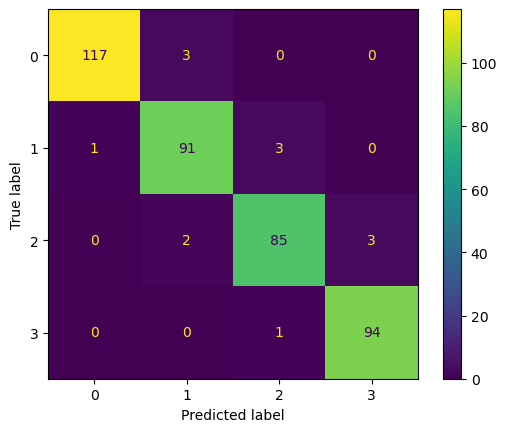

In [143]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,xtest,ytest)

# Classification report 

In [144]:
ypred_test = model.predict(xtest)

In [145]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       120
           1       0.95      0.96      0.95        95
           2       0.96      0.94      0.95        90
           3       0.97      0.99      0.98        95

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [146]:
from sklearn.metrics import f1_score
f1_score(ytest,ypred_test,average='macro')

0.9662400488801212

# Testing Logistic model on Test data

In [147]:
path2 = r"D:\Master in Data Science class\Project Documents\Mobile Price Classification\test.csv"
xnew = pd.read_csv(path2)
xnew

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [148]:
xnew = xnew.drop(columns=['id'])

In [149]:
xnew.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [150]:
pre

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [151]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097


In [152]:
price_range_pre = model.predict(xnew_pre)

In [153]:
price_range_pre[:10]

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0])

In [154]:
xnew['price_range_pre'] = price_range_pre

In [155]:
xnew.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range_pre
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


# Build model with The decision Tree classification

In [156]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
dtc = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=3,
    min_samples_leaf=3,
    criterion='gini'
)

In [158]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=3)

In [159]:
dtc.score(xtrain,ytrain)

0.883125

In [160]:
dtc.score(xtest,ytest)

0.8375

# Hyperparameter  tuning

In [161]:
from sklearn.model_selection import GridSearchCV

In [162]:
params ={
    'max_depth':[3,4,5,6,7,8,9,10],
    'min_samples_split':[1,2,3,4,5,6,7,8,9],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
    'criterion':['gini','entropy']
}

In [163]:
base_model = DecisionTreeClassifier()

In [164]:
gscv = GridSearchCV(estimator=base_model,param_grid=params,cv=4,scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [165]:
gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 6,
 'min_samples_split': 7}

In [166]:
gscv.best_score_

np.float64(0.8477715583459181)

In [167]:
gscv.score(xtrain,ytrain)

0.9499689009436852

In [168]:
gscv.score(xtest,ytest)

0.8518071989326463

In [178]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=6,
                       min_samples_split=7)

In [179]:
from sklearn.metrics import ConfusionMatrixDisplay

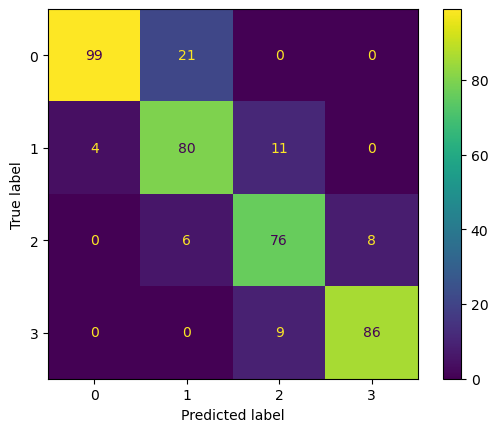

In [180]:
ConfusionMatrixDisplay.from_estimator(best_dtc,xtest,ytest)

# Classification Report

In [182]:
ypred_test2 = best_dtc.predict(xtest)
ypred_test2[:5]

array([3, 0, 0, 0, 3])

In [183]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test2))


              precision    recall  f1-score   support

           0       0.96      0.82      0.89       120
           1       0.75      0.84      0.79        95
           2       0.79      0.84      0.82        90
           3       0.91      0.91      0.91        95

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



In [184]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
xtrain.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [ ]:
fea_names = xtrain.columns

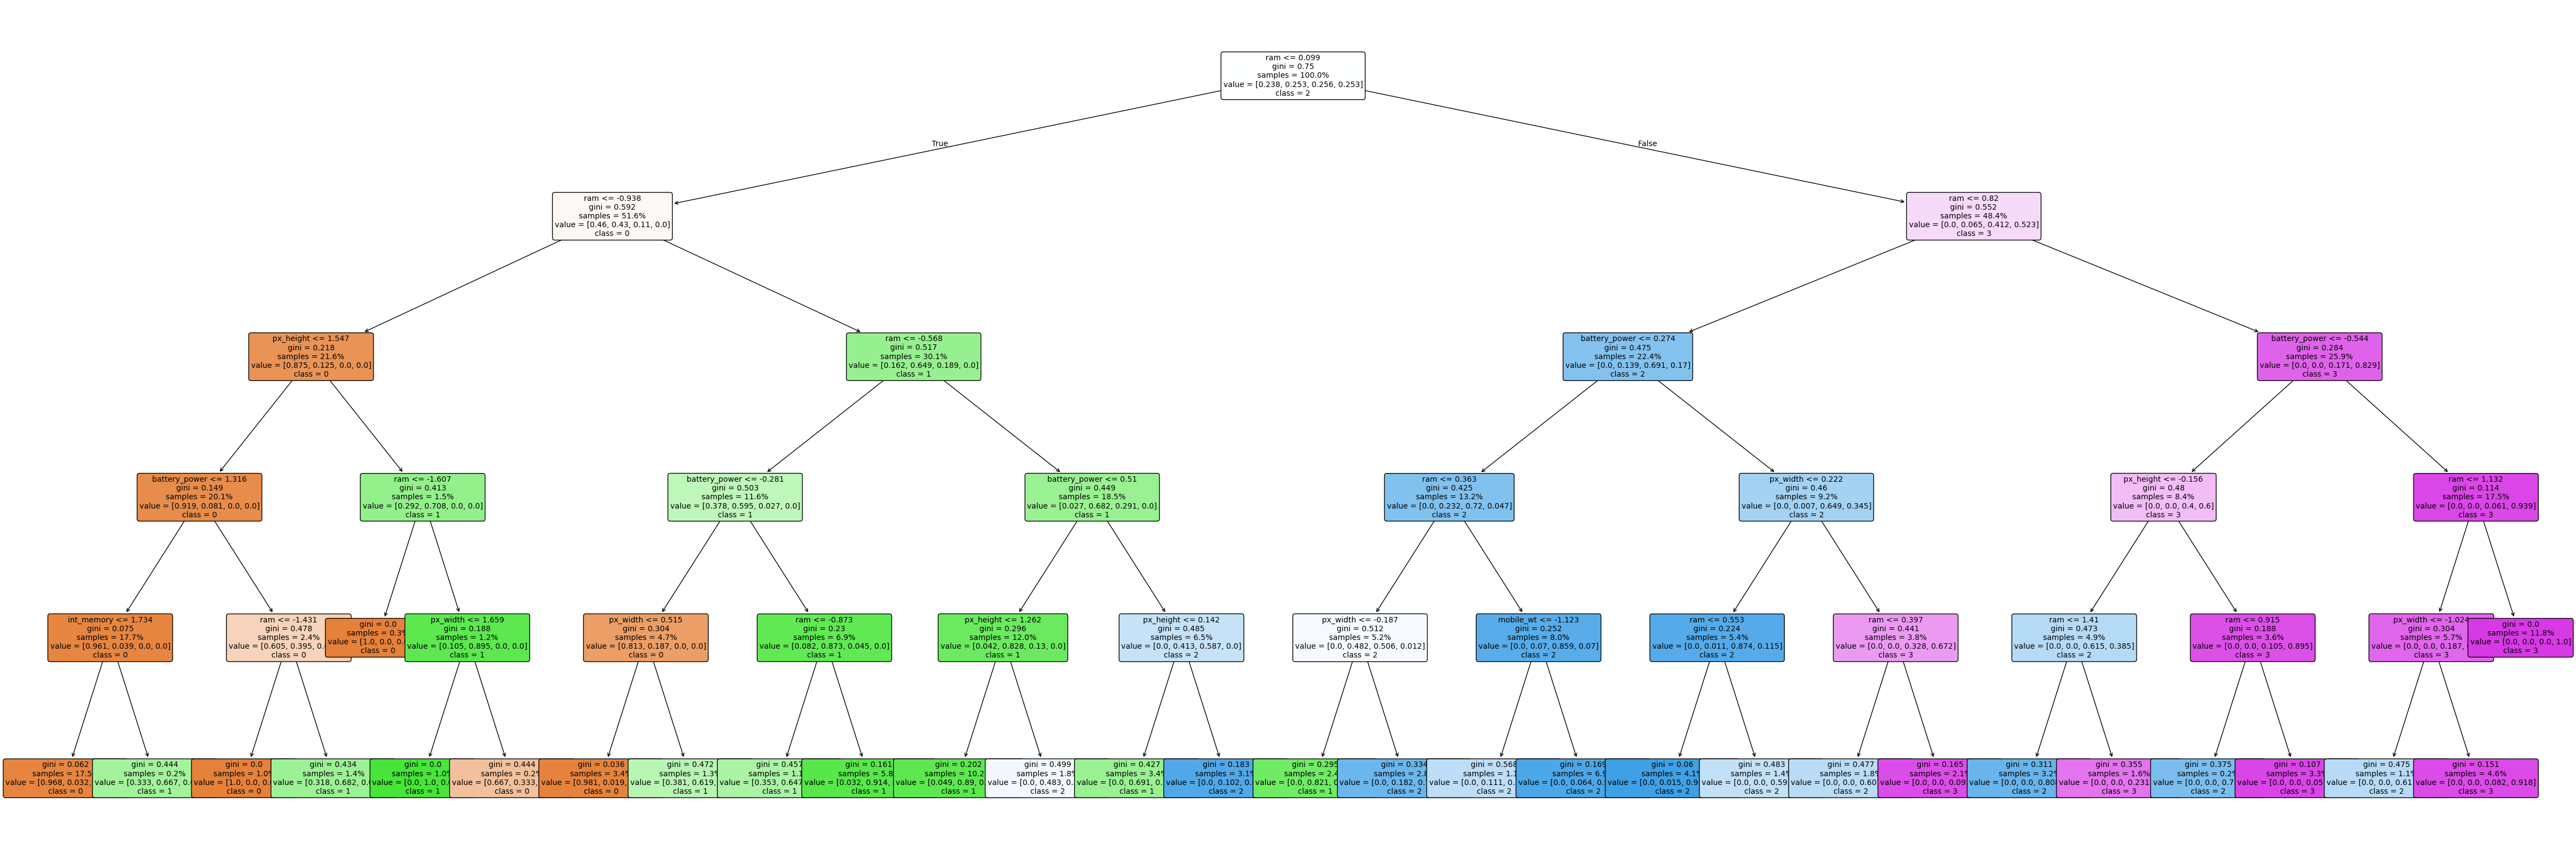

In [ ]:
plt.figure(figsize=(60,20))
plot_tree(
    dtc,
    feature_names=fea_names,
    class_names=[str(c) for c in dtc.classes_],
    filled=True,
    rounded=True,
    fontsize=10,
    proportion=True
)
plt.show()

# Build Model with Random Forest 

In [186]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
model = RandomForestClassifier(
    n_estimators=5,
    max_depth=4,
    min_samples_leaf=2,
    min_samples_split=5,
    criterion='gini'
)
model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=5)

In [191]:
model.score(xtrain,ytrain)

0.7625

In [192]:
model.score(xtest,ytest)

0.6575

# Hyperparameter Tuning

In [193]:
params = {
    'n_estimators':[5,10,35,50,75,100,150],
    'max_depth':[3,5,7,9,11]
}

Considering RandomSearchCV to perform hyperparameter tuning

In [197]:
from sklearn.model_selection import RandomizedSearchCV

In [198]:
base_model2 = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator=base_model2,param_distributions=params,cv=3,scoring='f1_macro')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [3, 5, 7, 9, 11],
                                        'n_estimators': [5, 10, 35, 50, 75, 100,
                                                         150]},
                   scoring='f1_macro')

In [200]:
rscv.best_params_

{'n_estimators': 150, 'max_depth': 9}

In [201]:
rscv.best_score_

np.float64(0.8708166110050293)

In [202]:
best_rfc = rscv.best_estimator_

In [204]:
best_rfc.score(xtrain,ytrain)

0.998125

In [205]:
best_rfc.score(xtest,ytest)

0.89

# Model Evaluation

In [206]:
from sklearn.metrics import ConfusionMatrixDisplay

In [209]:
ypred_test = model.predict(xtest)
ypred_test[:5]

array([3, 0, 0, 0, 3])

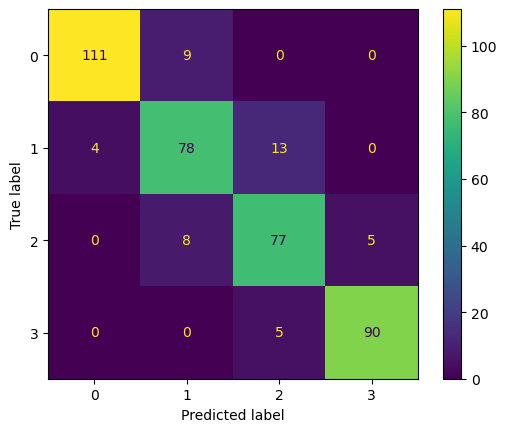

In [211]:
ConfusionMatrixDisplay.from_estimator(best_rfc,xtest,ytest)

In [212]:
from sklearn.metrics import classification_report

In [213]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.87      0.77      0.81       120
           1       0.53      0.58      0.56        95
           2       0.47      0.46      0.46        90
           3       0.73      0.79      0.76        95

    accuracy                           0.66       400
   macro avg       0.65      0.65      0.65       400
weighted avg       0.66      0.66      0.66       400

